In [1]:
import pandas as pd
from ydata_profiling import ProfileReport

c:\Users\Newton\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Carga y asignacion de la base de datos
df = pd.read_csv('iris/bezdekIris.csv')
profile = ProfileReport(df, title="Profiling Report")

FileNotFoundError: [Errno 2] No such file or directory: 'iris/bezdekIris.csv'

In [14]:
df.head()

,sepal_length\t,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Importar las librerias para el clustering por K-means
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
# Carga y visualizacion de los datos
iris = load_iris()

iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Impresion de los clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter = 300, random_state=0)
kmeans.fit(iris.data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [18]:
# Asignacion de los labels para los clusters
iris_df['cluster'] = kmeans.labels_
# Visualizacion de la distribucion del cluster
iris_df.groupby(['target', 'cluster']).agg({'sepal length (cm)':'count'})

sepal length (cm)
target cluster                   
0      1                       50
1      0                       47
       2                        3
2      0                       14
       2                       36

In [19]:
# Asignacion de los puntos en el espacio bidimensianal para su posterior graficacion
from sklearn.decomposition import PCA

pca = PCA(2)
pca_res = pca.fit_transform(iris.data)
iris_df['X'] = pca_res[:, 0]
iris_df['Y'] = pca_res[:, 1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,X,Y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


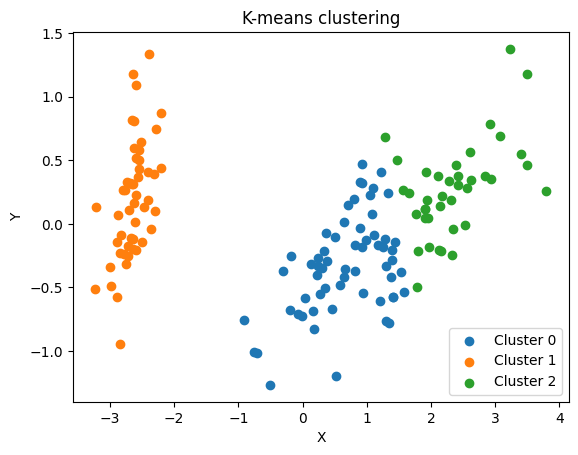

In [20]:
# Visualizacion de los clusters.

# Se importa de la libreria compatible con JupyterLab para la graficacion del cluster
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

# Asignacion de los clusters
cluster_0 = iris_df[iris_df['cluster'] == 0]
cluster_1 = iris_df[iris_df['cluster'] == 1]
cluster_2 = iris_df[iris_df['cluster'] == 2]

# Labeling de los clusters
plt.scatter(cluster_0['X'], cluster_0['Y'], label='Cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], label='Cluster 1')
plt.scatter(cluster_2['X'], cluster_2['Y'], label='Cluster 2')

plt.legend()
plt.title('K-means clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [21]:
# Mostrar profiling
profile.to_notebook_iframe()

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
# Convertir archivo del profiling a HTML
profile.to_file(".\my_report.html")